# USING THE NEW YORK TIME API, WE WILL ANALYZE SENTIMENT OF THE LAST TWO MONTHS OF THE YEAR FROM 1992-2019 TO PREDICT SENTIMENT FOR 2020.

In [1]:
import os
import pandas as pd
from dotenv import load_dotenv
#from nytimesarticle import articleAPI
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)
from pathlib import Path

import numpy as np
import hvplot.pandas

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

from sklearn.ensemble import RandomForestRegressor

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
load_dotenv()

True

In [19]:
#called api key
nyt_api_key = os.getenv("NYT_API")

api= articleAPI(nyt_api_key)

api

NameError: name 'articleAPI' is not defined

In [ ]:
# pulled articles from NYT (90s)
articles_92 = api.search(q="holiday sales",begin_date=19921101, end_date=19921231)
articles_93 = api.search(q="holiday sales",begin_date=19931101, end_date=19931231)
articles_94 = api.search(q="holiday sales",begin_date=19941101, end_date=19941231)
articles_95 = api.search(q="holiday sales",begin_date=19951101, end_date=19951231)
articles_96 = api.search(q="holiday sales",begin_date=19961101, end_date=19961231)
articles_97 = api.search(q="holiday sales",begin_date=19971101, end_date=19971231)
articles_98 = api.search(q="holiday sales",begin_date=19981101, end_date=19981231)
articles_99 = api.search(q="holiday sales",begin_date=19991101, end_date=19991231)

In [2]:
# pulled articles from NYT(00s)
articles_00 = api.search(q="holiday sales",begin_date=20001101, end_date=20001231)
articles_01 = api.search(q="holiday sales",begin_date=20011101, end_date=20011231)
articles_02 = api.search(q="holiday sales",begin_date=20021101, end_date=20021231)
articles_03 = api.search(q="holiday sales",begin_date=20031101, end_date=20031231)
articles_04 = api.search(q="holiday sales",begin_date=20041101, end_date=20041231)
articles_05 = api.search(q="holiday sales",begin_date=20051101, end_date=20051231)
articles_06 = api.search(q="holiday sales",begin_date=20061101, end_date=20061231)
articles_07 = api.search(q="holiday sales",begin_date=20071101, end_date=20071231)
articles_08 = api.search(q="holiday sales",begin_date=20081101, end_date=20081231)
articles_09 = api.search(q="holiday sales",begin_date=20091101, end_date=20091231)


NameError: name 'api' is not defined

In [3]:
#pulled articles for NYT (00-19)
articles_10 = api.search(q="holiday sales",begin_date=20101101, end_date=20101231)
articles_11 = api.search(q="holiday sales",begin_date=20111101, end_date=20111231)
articles_12 = api.search(q="holiday sales",begin_date=20121101, end_date=20121231)
articles_13 = api.search(q="holiday sales",begin_date=20131101, end_date=20131231)
articles_14 = api.search(q="holiday sales",begin_date=20141101, end_date=20141231)
articles_15 = api.search(q="holiday sales",begin_date=20151101, end_date=20151231)
articles_16 = api.search(q="holiday sales",begin_date=20161101, end_date=20161231)
articles_17 = api.search(q="holiday sales",begin_date=20171101, end_date=20171231)
articles_18 = api.search(q="holiday sales",begin_date=20181101, end_date=20181231)
articles_19 = api.search(q="holiday sales",begin_date=20191101, end_date=20191231)


NameError: name 'api' is not defined

In [4]:
# Dataframe for 92
articles92= articles_92['response']
articles_df_92 = pd.DataFrame(articles92['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])

articles_df_92.head()

NameError: name 'articles_92' is not defined

In [5]:
# Dataframe for 93
articles93= articles_93['response']
articles_df_93 = pd.DataFrame(articles93['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_93.head()

NameError: name 'articles_93' is not defined

In [6]:
# Dataframe for 94
articles94= articles_94['response']
articles_df_94 = pd.DataFrame(articles94['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_94.head()

NameError: name 'articles_94' is not defined

In [7]:
# Dataframe for 95
articles95= articles_95['response']
articles_df_95 = pd.DataFrame(articles95['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_95.head()

NameError: name 'articles_95' is not defined

In [8]:
# Dataframe for 96
articles96= articles_96['response']
articles_df_96 = pd.DataFrame(articles96['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_96.head()

NameError: name 'articles_96' is not defined

In [9]:
# Dataframe for 97
articles97= articles_97['response']
articles_df_97 = pd.DataFrame(articles97['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_97.head()

NameError: name 'articles_97' is not defined

In [10]:
# Dataframe for 98
articles98= articles_98['response']
articles_df_98 = pd.DataFrame(articles98['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_98.head()

NameError: name 'articles_98' is not defined

In [11]:
# Dataframe for 99
articles99= articles_99['response']
articles_df_99 = pd.DataFrame(articles99['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_99.head()

NameError: name 'articles_99' is not defined

In [12]:
# Dataframe for 00
articles00= articles_00['response']
articles_df_00 = pd.DataFrame(articles00['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_00.head()

NameError: name 'articles_00' is not defined

In [13]:
# Dataframe for 01
articles01= articles_01['response']
articles_df_01 = pd.DataFrame(articles01['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_01.head()

NameError: name 'articles_01' is not defined

In [ ]:
# Dataframe for 02
articles02= articles_02['response']
articles_df_02 = pd.DataFrame(articles02['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_02.head()

In [ ]:
# Dataframe for 03
articles03= articles_03['response']
articles_df_03 = pd.DataFrame(articles03['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_03.head()

In [ ]:
# Dataframe for 04
articles04= articles_04['response']
articles_df_04 = pd.DataFrame(articles04['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_04.head()

In [ ]:
# Dataframe for 05
articles05= articles_05['response']
articles_df_05 = pd.DataFrame(articles05['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_05.head()

In [ ]:
# Dataframe for 06
articles06= articles_06['response']
articles_df_06 = pd.DataFrame(articles06['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_06.head()

In [ ]:
# Dataframe for 07
articles07= articles_07['response']
articles_df_07 = pd.DataFrame(articles07['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_07.head()

In [ ]:
# Dataframe for 08
articles08= articles_08['response']
articles_df_08 = pd.DataFrame(articles08['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_08.head()

In [ ]:
# Dataframe for 09
articles09= articles_09['response']
articles_df_09 = pd.DataFrame(articles09['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_09.head()

In [ ]:
# Dataframe for 10
articles10= articles_10['response']
articles_df_10 = pd.DataFrame(articles10['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_10.head()

In [ ]:
# Dataframe for 11
articles11= articles_11['response']
articles_df_11 = pd.DataFrame(articles11['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_11.head()

In [ ]:
# Dataframe for 12
articles12= articles_12['response']
articles_df_12 = pd.DataFrame(articles12['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_12.head()

In [ ]:
# Dataframe for 13
articles13= articles_13['response']
articles_df_13 = pd.DataFrame(articles13['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_13.head()

In [ ]:
# Dataframe for 14
articles14= articles_14['response']
articles_df_14 = pd.DataFrame(articles14['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_14.head()

In [ ]:
# Dataframe for 15
articles15= articles_15['response']
articles_df_15 = pd.DataFrame(articles15['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_15.head()

In [ ]:
# Dataframe for 16
articles16= articles_16['response']
articles_df_16 = pd.DataFrame(articles16['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_16.head()

In [ ]:
# Dataframe for 17
articles17= articles_17['response']
articles_df_17 = pd.DataFrame(articles17['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_17.head()

In [ ]:
# Dataframe for 18
articles18= articles_18['response']
articles_df_18 = pd.DataFrame(articles18['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_18.head()

In [ ]:
# Dataframe for 19
articles19= articles_19['response']
articles_df_19 = pd.DataFrame(articles19['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_19.head()

In [14]:
#concat all dataframes into one

NYT_articles= pd.concat([articles_df_92,articles_df_93,articles_df_94, articles_df_95, articles_df_96,articles_df_97,articles_df_98,articles_df_99,articles_df_00
                        ,articles_df_01,articles_df_02, articles_df_03, articles_df_04, articles_df_05
                        ,articles_df_06, articles_df_07, articles_df_08, articles_df_09
                        , articles_df_10,articles_df_11, articles_df_12, articles_df_13,articles_df_14,articles_df_15
                        ,articles_df_16, articles_df_17, articles_df_18,articles_df_19])
NYT_articles.head()

NameError: name 'articles_df_92' is not defined

In [15]:
# clean up data

NYT_articles.isnull().sum()


NameError: name 'NYT_articles' is not defined

In [ ]:
# create a dataframe with just the abstract.

NYT_abstract= NYT_articles.drop(columns=['headline','keywords','lead_paragraph'])
NYT_abstract.head()

In [ ]:
NYT_abstract.reset_index().head()

In [ ]:
# function to get sentiment from dataframe NYT_abstract

def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [ ]:
# created sentiment scores for "abstract" and a new dataframe with scores.

nltk_results=[nltk_sentiment(abstract) for abstract in NYT_abstract["abstract"]]
results_df = pd.DataFrame(nltk_results)

nltk_df = results_df.join(NYT_abstract.reset_index())
nltk_df= nltk_df[['pub_date', 'abstract','compound', 'neg', 'neu', 'pos']]
nltk_df.head()

In [ ]:
nltk_df.to_csv("NYT_nlk_updated")

In [ ]:
nltk_df.describe()

In [ ]:
nltk_df.to_csv("NYT_updated.csv")

In [21]:
# loading full data

file_path=Path("NEW_Nov_Dec_NLTK_Average_Sentiment_Score_2.csv")
NYTIMES_df=pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True)
NYTIMES_df=NYTIMES_df.set_index('DATE').sort_values('DATE',ascending=True)
NYTIMES_df.head()

compound
DATE               
11/1/1992  0.812100
11/1/1993  0.762175
11/1/1994  0.667100
11/1/1995  0.485533
11/1/1996  0.722600

# importing Nov Dec retail sales with all the features

In [2]:

file_path=Path("nov_dec_featuress.csv")
Nov_dec_df=pd.read_csv(file_path, index_col="DATE",infer_datetime_format=True,parse_dates=True)
#Nov_dec_df=Nov_dec_df.set_index('DATE').sort_values('DATE',ascending=True)
Nov_dec_df=Nov_dec_df.sort_values('DATE',ascending=True)


In [3]:
Nov_dec_df.tail()

y_monthly_retail  gas_prices  consumer_sentiments  \
DATE                                                            
2018-11-01          446894.0     2.64725                 97.5   
2018-12-01          435953.0     2.36560                 98.3   
2019-11-01          460760.0     2.59775                 96.8   
2019-12-01          460512.0     2.55500                 99.3   
NaT                      NaN         NaN                  NaN   

            unemployment_rate      CPI  dow_index  Consumer_debt_service  \
DATE                                                                       
2018-11-01                3.7  252.662     97.196               5.520130   
2018-12-01                3.9  252.653     95.735               5.520130   
2019-11-01                3.5  257.824     98.202               5.614131   
2019-12-01                3.5  258.444     96.058               5.614131   
NaT                       NaN      NaN     93.688               4.972469   

            Pct_chng_prv_yr      GDPC1  
DATE                                    
2018-11-01              2.5  18813.923  
2018-12-01              2.5  18813.923  
2019-11-01              2.3  19253.959  
2019-12-01              2.3  19253.959  
NaT                    -9.0  17302.511

In [4]:
Main_df= NYTIMES_df.join(Nov_dec_df,sort=False)
Main_df.head()

NameError: name 'NYTIMES_df' is not defined

In [5]:
Main_df.tail()

NameError: name 'Main_df' is not defined

In [8]:
all_months=pd.read_csv(Path("..//HolidaySales/DataSets/features.csv"),  index_col="DATE",infer_datetime_format=True,parse_dates=True)

# Exploratory Data Analysis 

In [9]:
#Holiday Sales
Main_df[["y_monthly_retail"]].plot(figsize=(12, 8), title="Holiday Sales")
algo_data=Main_df["y_monthly_retail"]

NameError: name 'Main_df' is not defined

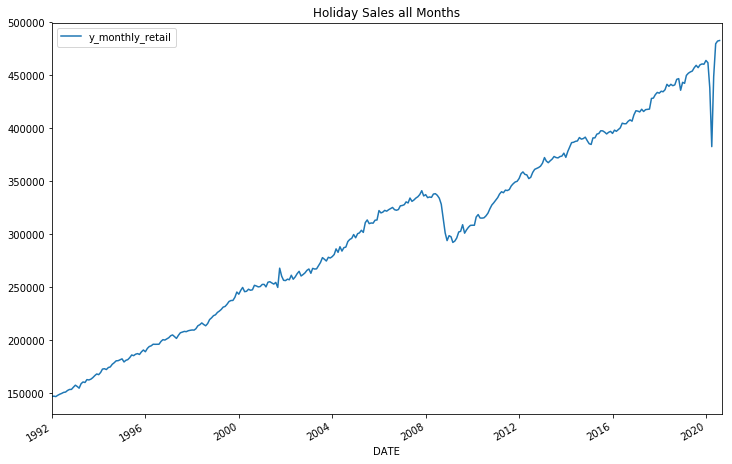

In [28]:
all_months[["y_monthly_retail"]].plot(figsize=(12, 8), title="Holiday Sales all Months")

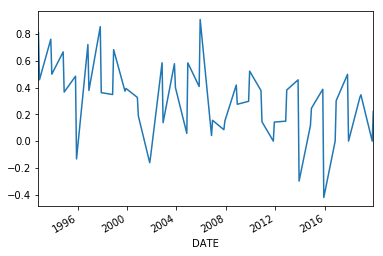

In [29]:
#NYT times sentiments graphs
Main_df["compound"].plot()

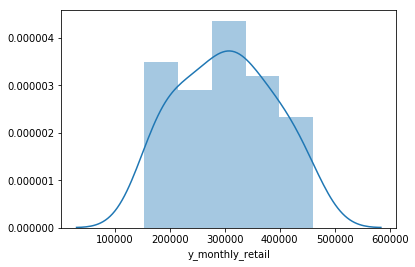

In [30]:
sns.distplot(Main_df.y_monthly_retail)

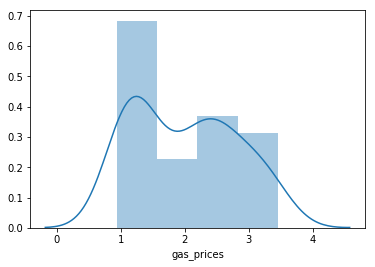

In [31]:
sns.distplot(Main_df.gas_prices)

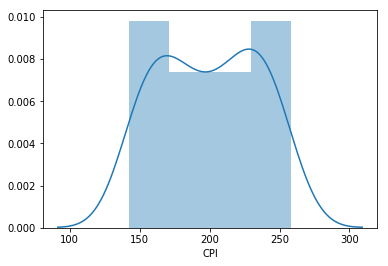

In [32]:
sns.distplot(Main_df.CPI)

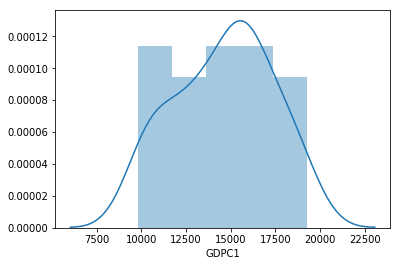

In [33]:
sns.distplot(Main_df.GDPC1)

# Application of Hodrick-Prescott filter on the dataframe

In [6]:
#Hodrick-Prescott filter on columns "y_monthly_retail" , "CPI", 'GDP_growth', 'GDPC1'
import statsmodels.api as sm
Main_df.sort_index(inplace=True)
ts_noise1, ts_trend1 = sm.tsa.filters.hpfilter(Main_df['y_monthly_retail'])
ts_noise2, ts_trend2 = sm.tsa.filters.hpfilter(Main_df['CPI'])
ts_noise4, ts_trend4 = sm.tsa.filters.hpfilter(Main_df['GDPC1'])

NameError: name 'Main_df' is not defined

In [7]:
Main_df['Sales']= ts_noise1
Main_df['CPI']= ts_noise2
Main_df['GDP']= ts_noise4
Main_df= Main_df.drop(columns={'y_monthly_retail','GDPC1'})
Main_df= Main_df.rename(columns={'Pct_chng_prv_yr':'GDP_growth', 'Sales':'sales', 'compound':'NYT_sentiment', 'dow_index':'retail_index'})
Main_df.tail()

NameError: name 'ts_noise1' is not defined

In [307]:
Main_df.to_csv("Main_df.csv")

In [36]:
#combiing our Main_df dataframe with Gold returns
file_path=Path("MAIN_DF_WITH_GOLD.csv")
MAIN_df=pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True)
MAIN_df=MAIN_df.set_index('DATE').sort_values('DATE',ascending=True).drop(columns={'Unnamed: 0'})
MAIN_df.head()

NYT_sentiment  gas_prices  consumer_sentiments  unemployment_rate  \
DATE                                                                           
11/1/1992       0.812100     1.11120                 85.3                7.4   
11/1/1993       0.762175     1.06640                 81.2                6.6   
11/1/1994       0.667100     1.11575                 91.6                5.6   
11/1/1995       0.485533     1.06225                 88.2                5.6   
11/1/1996       0.722600     1.23225                 99.2                5.4   

                CPI  Retail_Index_Returns  Consumer_debt_service  GDP_growth  \
DATE                                                                           
11/1/1992 -3.664766              0.000000               4.660212         4.4   
11/1/1993 -4.077295              0.058275               4.755414         2.6   
11/1/1994 -4.587534             -0.075080               5.120072         4.1   
11/1/1995 -4.990644             -0.042830               5.594352         2.2   
11/1/1996 -4.278919              0.029401               5.777011         4.4   

                 sales         GDP  Gold_Returns  
DATE                                              
11/1/1992 -18182.99304 -576.109447      0.000000  
11/1/1993 -15860.78098 -676.804025      0.069956  
11/1/1994 -12429.20455 -618.354534      0.058500  
11/1/1995 -14721.98639 -742.978904     -0.006632  
11/1/1996 -14186.08089 -621.669592     -0.011389

In [111]:
MAIN_df.columns

Index(['NYT_sentiment', 'gas_prices', 'consumer_sentiments',
       'unemployment_rate', 'CPI', 'Retail_Index_Returns',
       'Consumer_debt_service', 'GDP_growth', 'sales', 'GDP', 'Gold_Returns'],
      dtype='object')

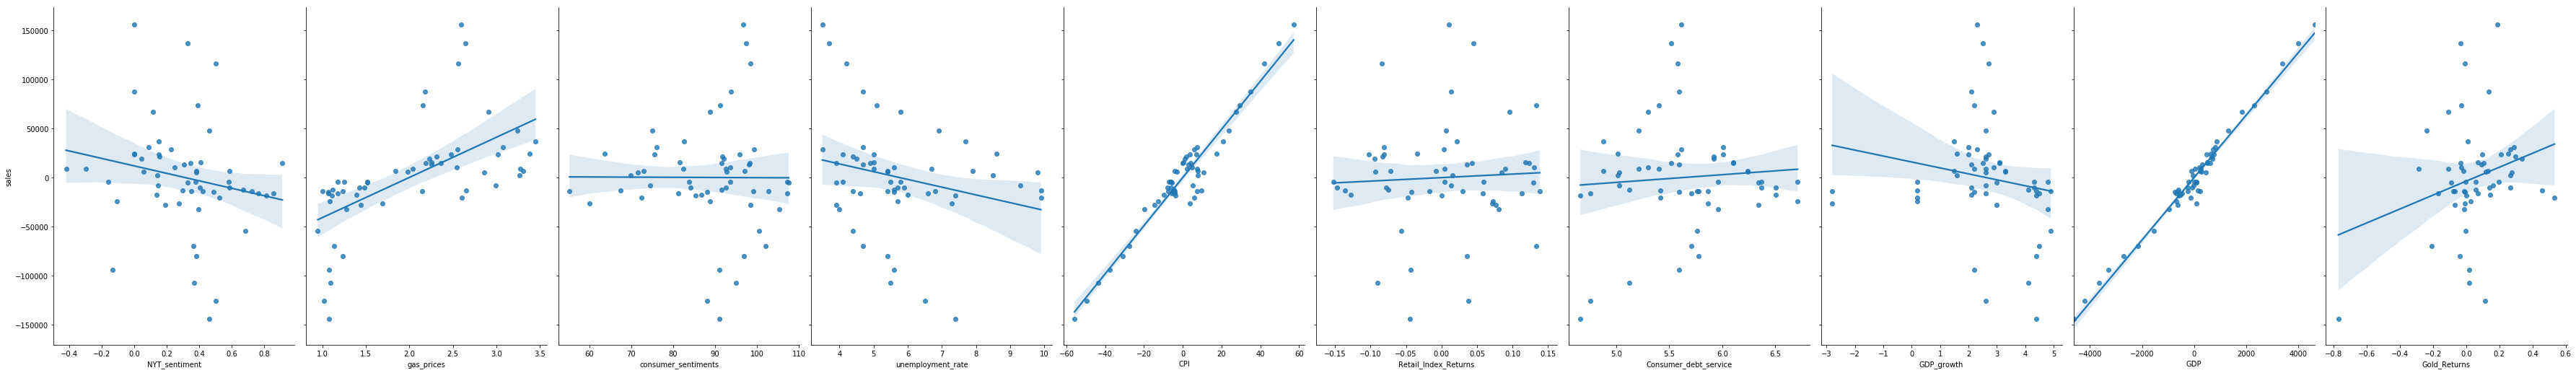

In [112]:
sns.pairplot(MAIN_df, x_vars=['NYT_sentiment','gas_prices', 'consumer_sentiments','unemployment_rate','CPI','Retail_Index_Returns','Consumer_debt_service','GDP_growth','GDP', 'Gold_Returns'], y_vars='sales', height=7, aspect=.7, kind='reg')

In [113]:
#quantified pearson corelation values between sales and other features(GDPCI)
MAIN_df.CPI.corr(MAIN_df.sales)

0.965211349955966

In [114]:
MAIN_df.GDP.corr(MAIN_df.sales)

0.9884916815568923

In [115]:
MAIN_df.corr()

NYT_sentiment  gas_prices  consumer_sentiments  \
NYT_sentiment               1.000000   -0.359748             0.141274   
gas_prices                 -0.359748    1.000000            -0.491512   
consumer_sentiments         0.141274   -0.491512             1.000000   
unemployment_rate           0.041893    0.325284            -0.772300   
CPI                        -0.183963    0.682532            -0.201631   
Retail_Index_Returns        0.065903   -0.010009             0.074400   
Consumer_debt_service      -0.114457   -0.302524             0.267027   
GDP_growth                  0.345912   -0.367889             0.732948   
sales                      -0.197558    0.599383            -0.003984   
GDP                        -0.181612    0.590662            -0.054932   
Gold_Returns               -0.070163    0.283855            -0.283533   

                       unemployment_rate       CPI  Retail_Index_Returns  \
NYT_sentiment                   0.041893 -0.183963              0.065903   
gas_prices                      0.325284  0.682532             -0.010009   
consumer_sentiments            -0.772300 -0.201631              0.074400   
unemployment_rate               1.000000 -0.021729             -0.111256   
CPI                            -0.021729  1.000000              0.087599   
Retail_Index_Returns           -0.111256  0.087599              1.000000   
Consumer_debt_service          -0.483871 -0.059089             -0.111948   
GDP_growth                     -0.381928 -0.324210             -0.102468   
sales                          -0.243156  0.965211              0.054107   
GDP                            -0.204064  0.969799              0.067469   
Gold_Returns                    0.203592  0.276589             -0.392724   

                       Consumer_debt_service  GDP_growth     sales       GDP  \
NYT_sentiment                      -0.114457    0.345912 -0.197558 -0.181612   
gas_prices                         -0.302524   -0.367889  0.599383  0.590662   
consumer_sentiments                 0.267027    0.732948 -0.003984 -0.054932   
unemployment_rate                  -0.483871   -0.381928 -0.243156 -0.204064   
CPI                                -0.059089   -0.324210  0.965211  0.969799   
Retail_Index_Returns               -0.111948   -0.102468  0.054107  0.067469   
Consumer_debt_service               1.000000   -0.060483  0.076767  0.128035   
GDP_growth                         -0.060483    1.000000 -0.179655 -0.242846   
sales                               0.076767   -0.179655  1.000000  0.988492   
GDP                                 0.128035   -0.242846  0.988492  1.000000   
Gold_Returns                        0.195521   -0.265495  0.258122  0.297074   

                       Gold_Returns  
NYT_sentiment             -0.070163  
gas_prices                 0.283855  
consumer_sentiments       -0.283533  
unemployment_rate          0.203592  
CPI                        0.276589  
Retail_Index_Returns      -0.392724  
Consumer_debt_service      0.195521  
GDP_growth                -0.265495  
sales                      0.258122  
GDP                        0.297074  
Gold_Returns               1.000000

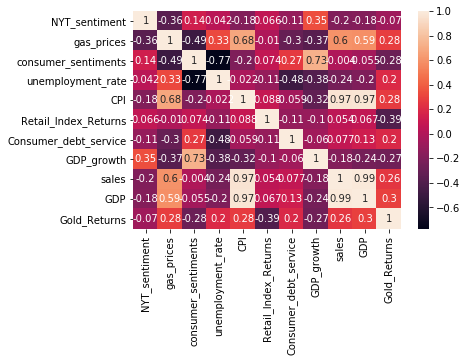

In [116]:
#heath map of the dataframe
sns.heatmap(MAIN_df.corr(),annot=True)

# Regression Model

In [117]:
#Xy split- training and testing
X=MAIN_df.copy()

In [118]:
X.drop({"sales"}, axis=1, inplace=True)

In [119]:
y=MAIN_df['sales'].values.reshape(-1,1)

In [120]:

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1)

NameError: name 'train_test_split' is not defined

In [121]:
Linreg=LinearRegression()

NameError: name 'LinearRegression' is not defined

In [100]:
Linreg.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred=Linreg.predict(X_test)
y_pred[:]

array([[-11648.10453745],
       [-12778.4832838 ],
       [ -5309.7576766 ],
       [ 24439.51509415],
       [-76529.48920006],
       [-62110.66137452],
       [-20965.61450299],
       [ -6991.77600811],
       [ 13202.94837475],
       [ 20076.80509959],
       [  -217.34049184],
       [ 47343.18330168],
       [-19659.01658021],
       [  4688.23636716]])

In [102]:
y_pred

array([[-11648.10453745],
       [-12778.4832838 ],
       [ -5309.7576766 ],
       [ 24439.51509415],
       [-76529.48920006],
       [-62110.66137452],
       [-20965.61450299],
       [ -6991.77600811],
       [ 13202.94837475],
       [ 20076.80509959],
       [  -217.34049184],
       [ 47343.18330168],
       [-19659.01658021],
       [  4688.23636716]])

In [103]:
ts_trend1

DATE
1992-11-01    171765.993040
1993-11-01    182454.780982
1994-11-01    193132.204553
1995-11-01    203776.986394
1996-11-01    214360.080895
1997-11-01    224843.241201
1998-11-01    235179.354159
1999-11-01    245311.364590
2000-11-01    255173.438969
2001-11-01    264696.764165
2002-11-01    273809.500527
2003-11-01    282437.194174
2004-11-01    290498.990288
2005-11-01    297911.447052
2006-11-01    304594.671410
2007-11-01    310478.390023
2008-11-01    315504.047257
2009-11-01    319632.246612
2010-11-01    322814.734057
2011-11-01    324995.157281
2012-11-01    326120.176640
2013-11-01    326151.675517
2014-11-01    325074.595309
2015-11-01    322903.669492
2016-11-01    319695.259294
2017-11-01    315551.571774
2018-11-01    310629.230079
2019-11-01    305157.538251
1992-12-01    299450.965810
1993-12-01    293921.233816
1994-12-01    288890.165226
1995-12-01    284600.982851
1996-12-01    281229.805646
1997-12-01    278894.110705
1998-12-01    277661.408992
1999-12-01    2

In [104]:
#mean absolute error
mae=(metrics.mean_absolute_error(y_test, y_pred))
mae

4587.893268471552

In [105]:
#mean squared error
mse=(metrics.mean_squared_error(y_test, y_pred))
mse

37832238.890298314

In [106]:
#root mean squared error
rmse=(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rmse

6150.791728736905

In [107]:
#r2
r2=r2_score(y_test, y_pred)
r2

0.9665721053648395

In [108]:
## out of sample-shifted up

## DECISION TREE

In [128]:
# Define features set
X = MAIN_df.copy()
X.drop({"sales"}, axis=1, inplace=True)

X.head()


NYT_sentiment  gas_prices  consumer_sentiments  unemployment_rate  \
DATE                                                                           
11/1/1992       0.812100     1.11120                 85.3                7.4   
11/1/1993       0.762175     1.06640                 81.2                6.6   
11/1/1994       0.667100     1.11575                 91.6                5.6   
11/1/1995       0.485533     1.06225                 88.2                5.6   
11/1/1996       0.722600     1.23225                 99.2                5.4   

                CPI  Retail_Index_Returns  Consumer_debt_service  GDP_growth  \
DATE                                                                           
11/1/1992 -3.664766              0.000000               4.660212         4.4   
11/1/1993 -4.077295              0.058275               4.755414         2.6   
11/1/1994 -4.587534             -0.075080               5.120072         4.1   
11/1/1995 -4.990644             -0.042830               5.594352         2.2   
11/1/1996 -4.278919              0.029401               5.777011         4.4   

                  GDP  Gold_Returns  
DATE                                 
11/1/1992 -576.109447      0.000000  
11/1/1993 -676.804025      0.069956  
11/1/1994 -618.354534      0.058500  
11/1/1995 -742.978904     -0.006632  
11/1/1996 -621.669592     -0.011389

In [129]:
# Define target vector
y = MAIN_df["sales"].values.reshape(-1, 1)
y[:5]


array([[-18182.99304],
       [-15860.78098],
       [-12429.20455],
       [-14721.98639],
       [-14186.08089]])

In [130]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [131]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeRegressor()
# Fitting the model
DecisionRegressor = model.fit(X_train, y_train)




In [132]:
# Making predictions using the testing data
predictions = DecisionRegressor.predict(X_test)



In [133]:
Predictions_tree=pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)
Predictions_tree.head()

Prediction        Actual
0 -27909.14982 -24116.553180
1  14725.14937  13296.818400
2  66604.40469  87065.740710
3 -14186.08089  10382.970910
4  36892.82336   4820.265943

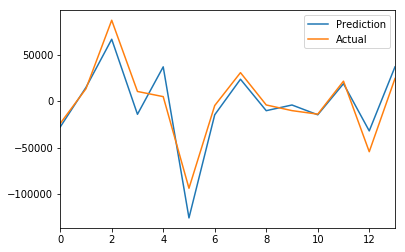

In [134]:
Predictions_tree.plot()

In [135]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test, predictions)


0.8236776071467342

In [136]:
mse = mean_squared_error(y_test, predictions)
mse

284195174.4132707

In [137]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

16858.08928714256

## NEW DF FOR PREDICTIVE MODEL

In [138]:
Main_2= MAIN_df.copy()
Main_2['shifted_sales']= Main_2.sales.shift()
Main_2=Main_2.dropna()
Main_2=Main_2.reset_index()
Main_2.head()

DATE  NYT_sentiment  gas_prices  consumer_sentiments  \
0  11/1/1993       0.762175     1.06640                 81.2   
1  11/1/1994       0.667100     1.11575                 91.6   
2  11/1/1995       0.485533     1.06225                 88.2   
3  11/1/1996       0.722600     1.23225                 99.2   
4  11/1/1997       0.855950     1.17075                107.2   

   unemployment_rate       CPI  Retail_Index_Returns  Consumer_debt_service  \
0                6.6 -4.077295              0.058275               4.755414   
1                5.6 -4.587534             -0.075080               5.120072   
2                5.6 -4.990644             -0.042830               5.594352   
3                5.4 -4.278919              0.029401               5.777011   
4                4.6 -5.541533              0.112995               5.705666   

   GDP_growth        sales         GDP  Gold_Returns  shifted_sales  
0         2.6 -15860.78098 -676.804025      0.069956   -18182.99304  
1         4.1 -12429.20455 -618.354534      0.058500   -15860.78098  
2         2.2 -14721.98639 -742.978904     -0.006632   -12429.20455  
3         4.4 -14186.08089 -621.669592     -0.011389   -14721.98639  
4         4.5 -15907.24120 -467.952693     -0.168962   -14186.08089

In [139]:
Main_2['DATE'] =pd.to_datetime(Main_2.DATE)
Main_2= Main_2.set_index("DATE")

Main_2.head()

NYT_sentiment  gas_prices  consumer_sentiments  unemployment_rate  \
DATE                                                                            
1993-11-01       0.762175     1.06640                 81.2                6.6   
1994-11-01       0.667100     1.11575                 91.6                5.6   
1995-11-01       0.485533     1.06225                 88.2                5.6   
1996-11-01       0.722600     1.23225                 99.2                5.4   
1997-11-01       0.855950     1.17075                107.2                4.6   

                 CPI  Retail_Index_Returns  Consumer_debt_service  GDP_growth  \
DATE                                                                            
1993-11-01 -4.077295              0.058275               4.755414         2.6   
1994-11-01 -4.587534             -0.075080               5.120072         4.1   
1995-11-01 -4.990644             -0.042830               5.594352         2.2   
1996-11-01 -4.278919              0.029401               5.777011         4.4   
1997-11-01 -5.541533              0.112995               5.705666         4.5   

                  sales         GDP  Gold_Returns  shifted_sales  
DATE                                                              
1993-11-01 -15860.78098 -676.804025      0.069956   -18182.99304  
1994-11-01 -12429.20455 -618.354534      0.058500   -15860.78098  
1995-11-01 -14721.98639 -742.978904     -0.006632   -12429.20455  
1996-11-01 -14186.08089 -621.669592     -0.011389   -14721.98639  
1997-11-01 -15907.24120 -467.952693     -0.168962   -14186.08089

In [140]:
Main_2= Main_2.sort_index()
Main_2.head()

NYT_sentiment  gas_prices  consumer_sentiments  unemployment_rate  \
DATE                                                                            
1992-12-01       0.458857     1.07750                 91.0                7.4   
1993-11-01       0.762175     1.06640                 81.2                6.6   
1993-12-01       0.500550     1.01400                 88.2                6.5   
1994-11-01       0.667100     1.11575                 91.6                5.6   
1994-12-01       0.366667     1.09050                 95.1                5.5   

                  CPI  Retail_Index_Returns  Consumer_debt_service  \
DATE                                                                 
1992-12-01 -55.865683             -0.044113               4.660212   
1993-11-01  -4.077295              0.058275               4.755414   
1993-12-01 -49.461028              0.038244               4.755414   
1994-11-01  -4.587534             -0.075080               5.120072   
1994-12-01 -43.478215             -0.089986               5.120072   

            GDP_growth         sales          GDP  Gold_Returns  shifted_sales  
DATE                                                                            
1992-12-01         4.4 -143836.96580 -4628.850176     -0.770981   155602.46170  
1993-11-01         2.6  -15860.78098  -676.804025      0.069956   -18182.99304  
1993-12-01         2.6 -125760.23380 -4202.521831      0.114896  -143836.96580  
1994-11-01         4.1  -12429.20455  -618.354534      0.058500   -15860.78098  
1994-12-01         4.1 -107366.16520 -3636.164463      0.018762  -125760.23380

# DECISION TREE MODEL PREDICTIVE MODEL (SHIFTED Y)

In [141]:
# Define features set
X = Main_2.copy()
X.drop({"sales",'shifted_sales','Retail_Index_Returns', 'consumer_sentiments', 'gas_prices'}, axis=1, inplace=True)

X.head()


NYT_sentiment  unemployment_rate        CPI  \
DATE                                                      
1992-12-01       0.458857                7.4 -55.865683   
1993-11-01       0.762175                6.6  -4.077295   
1993-12-01       0.500550                6.5 -49.461028   
1994-11-01       0.667100                5.6  -4.587534   
1994-12-01       0.366667                5.5 -43.478215   

            Consumer_debt_service  GDP_growth          GDP  Gold_Returns  
DATE                                                                      
1992-12-01               4.660212         4.4 -4628.850176     -0.770981  
1993-11-01               4.755414         2.6  -676.804025      0.069956  
1993-12-01               4.755414         2.6 -4202.521831      0.114896  
1994-11-01               5.120072         4.1  -618.354534      0.058500  
1994-12-01               5.120072         4.1 -3636.164463      0.018762

In [142]:
# Define target vector
y = Main_2["shifted_sales"].values.reshape(-1, 1)
y[:5]


array([[ 155602.4617 ],
       [ -18182.99304],
       [-143836.9658 ],
       [ -15860.78098],
       [-125760.2338 ]])

In [143]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [144]:
X_test.shape

(14, 7)

In [148]:
X_train.shape

(41, 7)

In [146]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeRegressor()
# Fitting the model
DecisionRegressor = model.fit(X_train, y_train)




In [150]:
# Making predictions using the testing data
predictions = DecisionRegressor.predict(X_test)



In [151]:
Predictions_tree=pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)
Predictions_tree.head()

Prediction        Actual
0  -12957.246610   4820.265943
1  -12957.246610  24356.842720
2   -4139.194174 -10306.371500
3  116289.428200  87065.740710
4   -4842.438969 -27909.149820

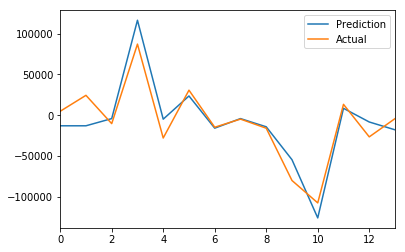

In [152]:
Predictions_tree.plot()

In [153]:
predictions

array([ -12957.24661 ,  -12957.24661 ,   -4139.194174,  116289.4282  ,
         -4842.438969,   23554.14551 ,  -15860.78098 ,   -4139.194174,
        -14186.08089 ,  -54482.40899 , -125760.2338  ,    8444.025888,
         -8292.319532,  -17873.47966 ])

In [154]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test, predictions)


0.8321124671723839

In [155]:
mse = mean_squared_error(y_test, predictions)
mse

336930397.10326445

In [156]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

18355.66389709902

# RANDOM FOREST MODEL

In [157]:
# Define features set
X = Main_df.copy()
X.drop({"sales"}, axis=1, inplace=True)
X.head()

# Define target vector
y = Main_df["sales"].values.reshape(-1, 1)
y[:5]



array([[-18182.99304049],
       [-15860.78098196],
       [-12429.20455277],
       [-14721.98639417],
       [-14186.08089454]])

In [158]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


## Fitting the Random Forest Model

In [159]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
# Making predictions using the testing data
predictions = rf_model.predict(X_test)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


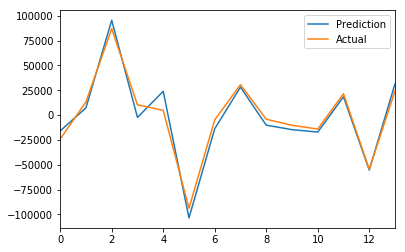

In [160]:

Predictions_forest=pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)
Predictions_forest.plot()

## EVALUATING RANDOM FOREST

In [161]:
r2_score(y_test, predictions)


0.9554075279949993

In [162]:
mse = mean_squared_error(y_test, predictions)
mse

71873828.12550409

In [163]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

8477.843365237653

## RANDOM FOREST PREDICTIVE MODEL

In [164]:
# Define features set
X = Main_2.copy()
X.drop({"sales",'shifted_sales','Retail_Index_Returns', 'consumer_sentiments', 'gas_prices'}, axis=1, inplace=True)

X.head()


NYT_sentiment  unemployment_rate        CPI  \
DATE                                                      
1992-12-01       0.458857                7.4 -55.865683   
1993-11-01       0.762175                6.6  -4.077295   
1993-12-01       0.500550                6.5 -49.461028   
1994-11-01       0.667100                5.6  -4.587534   
1994-12-01       0.366667                5.5 -43.478215   

            Consumer_debt_service  GDP_growth          GDP  Gold_Returns  
DATE                                                                      
1992-12-01               4.660212         4.4 -4628.850176     -0.770981  
1993-11-01               4.755414         2.6  -676.804025      0.069956  
1993-12-01               4.755414         2.6 -4202.521831      0.114896  
1994-11-01               5.120072         4.1  -618.354534      0.058500  
1994-12-01               5.120072         4.1 -3636.164463      0.018762

In [165]:
# Define target vector
y = Main_2["shifted_sales"].values.reshape(-1, 1)
y[:5]


array([[ 155602.4617 ],
       [ -18182.99304],
       [-143836.9658 ],
       [ -15860.78098],
       [-125760.2338 ]])

In [166]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [167]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
# Making predictions using the testing data
predictions_1 = rf_model.predict(X_test)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


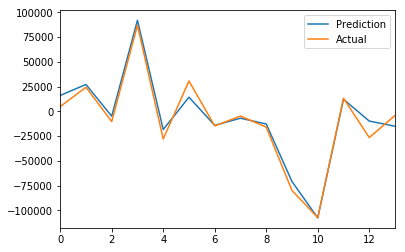

In [168]:

Predictions_forest=pd.DataFrame({"Prediction": predictions_1, "Actual": y_test.ravel()}).head(20)
Predictions_forest.plot()

In [169]:
r2_score(y_test, predictions_1)


0.9628939513351432

In [170]:
mse = mean_squared_error(y_test, predictions_1)
mse

74467445.56321658

In [171]:
mse= mean_squared_error(y_test, predictions_1)
rmse= np.sqrt(mse)
rmse

8629.452216868494

In [172]:
X_P= Main_2.tail(2)
X_P

NYT_sentiment  gas_prices  consumer_sentiments  unemployment_rate  \
DATE                                                                            
2019-11-01       0.000000     2.59775                 96.8                3.5   
2019-12-01       0.222725     2.55500                 99.3                3.5   

                  CPI  Retail_Index_Returns  Consumer_debt_service  \
DATE                                                                 
2019-11-01  57.165400              0.010350               5.614131   
2019-12-01   5.739651              0.003374               5.614131   

            GDP_growth         sales          GDP  Gold_Returns  shifted_sales  
DATE                                                                            
2019-11-01         2.3  155602.46170  4612.023799      0.186882   136264.76990  
2019-12-01         2.3   28358.26541   729.914743      0.266333    14725.14937

In [173]:
predictions_end = rf_model.predict(X)
predictions_end

array([  54944.84552452,  -13916.33571303, -101407.76352706,
        -16159.75164795, -110716.65222824,  -14233.10371317,
       -107675.28276355,  -14146.86076554,  -88727.10719252,
        -13632.41496685,  -70901.57016347,  -12791.34639226,
        -63163.4103279 ,  -12224.37430836,  -50377.78350674,
         -6923.25764525,  -27951.00081986,   -7770.50772708,
        -18371.32886851,  -15043.74023048,  -20461.93277406,
         -9335.21603985,  -15698.94515781,   -2192.97378871,
         -4892.1908865 ,    6784.17906909,    6430.35648868,
         15202.80732776,   14733.481425  ,   17646.5483508 ,
         19196.96155336,   14300.40391301,   14364.09584834,
         -7839.58235775,   -9811.54095412,   -6314.09806866,
        -14608.66272231,   16103.1190931 ,   -7718.59528539,
         27173.88432872,   -1585.78428583,   37094.04444547,
          3584.70421286,   53571.73278819,    8070.81945819,
         62077.37030336,   11035.51983019,   71468.99014946,
          8789.13548437,

In [174]:
Predictions_f=pd.DataFrame({"Prediction": predictions_end, "Actual": y.ravel()})
Predictions_f

Prediction         Actual
0    54944.845525  155602.461700
1   -13916.335713  -18182.993040
2  -101407.763527 -143836.965800
3   -16159.751648  -15860.780980
4  -110716.652228 -125760.233800
5   -14233.103713  -12429.204550
6  -107675.282764 -107366.165200
7   -14146.860766  -14721.986390
8   -88727.107193  -93826.982850
9   -13632.414967  -14186.080890
10  -70901.570163  -79945.805650
11  -12791.346392  -15907.241200
12  -63163.410328  -69531.110710
13  -12224.374308  -14045.354160
14  -50377.783507  -54482.408990
15   -6923.257645   -4767.364590
16  -27951.000820  -32070.754530
17   -7770.507727   -4842.438969
18  -18371.328869  -27909.149820
19  -15043.740230   -4182.764165
20  -20461.932774  -24116.553180
21   -9335.216040  -10241.500530
22  -15698.945158  -17873.479660
23   -2192.973789   -4139.194174
24   -4892.190886  -10306.371500
25    6784.179069    5678.009712
26    6430.356489    6826.500005
27   15202.807328   15391.552950
28   14733.481425   14695.305020
29   17646.548351   18748.328590
30   19196.961553   21482.947170
31   14300.403913   30654.609980
32   14364.095848   23554.145510
33   -7839.582358  -14172.047260
34   -9811.540954  -26505.807760
35   -6314.098069  -12957.246610
36  -14608.662722  -20602.341780
37   16103.119093    4820.265943
38   -7718.595285   -8292.319532
39   27173.884329   24356.842720
40   -1585.784286    2456.272430
41   37094.044445   36892.823360
42    3584.704213    6906.630272
43   53571.732788   47667.324480
44    8070.819458    8986.414982
45   62077.370303   66604.404690
46   11035.519830   10382.970910
47   71468.990149   73353.330510
48    8789.135484    8444.025888
49   92071.680402   87065.740710
50   12173.283147   13296.818400
51  111066.799472  116289.428200
52   20826.981849   23557.309410
53  120184.353855  136264.769900
54   17772.425843   14725.149370

In [175]:
Main_2.shape

(55, 12)

## GRADIENT BOOST MODEL

In [ ]:
# Define features set
X = MAIN_df.copy()
X.drop({"sales"}, axis=1, inplace=True)
X.head()

# Define target vector
y = MAIN_df["sales"].values.reshape(-1, 1)
y[:5]



In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=78)



In [ ]:
# Create a regression object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    regressor = GradientBoostingRegressor(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
# Fit the model
regressor.fit(X_train, y_train.ravel())
    
# Make Prediction
predictions = regressor.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

In [ ]:
# Choose a learning rate and create regression
classifier = GradientBoostingRegressor(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train, y_train.ravel())

# Make Prediction
predictions = classifier.predict(X_test)
predict=pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)
predict.plot()

## EVALUATING THE MODEL

In [ ]:
r2_score(y_test, predictions)


In [ ]:
mse = mean_squared_error(y_test, predictions)
mse

In [ ]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

## GRADIENT BOOST PREDICTIVE

In [ ]:
# Define features set
X = Main_2.copy()
X.drop({"sales",'shifted_sales','Retail_Index_Returns', 'consumer_sentiments', 'gas_prices'}, axis=1, inplace=True)

X.head()


In [ ]:
# Define target vector
y = Main_2["shifted_sales"].values.reshape(-1, 1)
y[:5]


In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=78)



In [ ]:
# Create a regression object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    regressor = GradientBoostingRegressor(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
# Fit the model
regressor.fit(X_train, y_train.ravel())
    
# Make Prediction
predictions = regressor.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

In [ ]:
r2_score(y_test, predictions)


In [ ]:
mse = mean_squared_error(y_test, predictions)
mse

In [ ]:
mse= mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
rmse

# **LSTM/ Gold vs. Retail Relationship Work**

In [37]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.tsa
import statsmodels.tsa.stattools as ts 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [38]:
# DataFrame of Monthly Gold Prices 1992-2020.
file_path=Path("~/git/HolidaySales/DataSets/1992_To_2020_Monthly_Gold_clean.csv")
full_gold_df=pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [39]:
full_gold_df.head()

close
DATE              
1992-01-01  350.90
1992-02-01  356.40
1992-03-01  350.45
1992-04-01  344.00
1992-05-01  337.50

In [40]:
# DataFrame of ALL features not including NLP sentiment from 1992 to 2020 Monthly.
file_path2=Path("~/git/HolidaySales/DataSets/features.csv")
features_df=pd.read_csv(file_path2,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [41]:
features_df.head()

y_monthly_retail  gas_prices  consumer_sentiments  \
DATE                                                            
1992-01-01          146925.0     1.02200                 67.5   
1992-02-01          147223.0     1.00600                 68.8   
1992-03-01          146805.0     1.01260                 76.0   
1992-04-01          148032.0     1.05175                 77.2   
1992-05-01          149010.0     1.10725                 79.2   

            unemployment_rate    CPI  dow_index  Consumer_debt_service  \
DATE                                                                     
1992-01-01                7.3  138.3      88.41               4.867179   
1992-02-01                7.4  138.6      89.32               4.867179   
1992-03-01                7.4  139.1      90.88               4.867179   
1992-04-01                7.4  139.4      90.33               4.774439   
1992-05-01                7.6  139.7      87.50               4.774439   

            Pct_chng_prv_yr     GDPC1  
DATE                                   
1992-01-01              2.9  9534.346  
1992-02-01              2.9  9534.346  
1992-03-01              2.9  9534.346  
1992-04-01              3.2  9637.732  
1992-05-01              3.2  9637.732

In [42]:
# DataFrame of ALL features not including NLP sentiment from 1992 to 2020 Nov.-Dec. only.
file_path3=Path("~/git/HolidaySales/nov_dec_featuress.csv")
features_cut_df=pd.read_csv(file_path3,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [43]:
features_cut_df.head()

y_monthly_retail  gas_prices  consumer_sentiments  \
DATE                                                            
1992-11-01          153583.0     1.11120                 85.3   
1992-12-01          155614.0     1.07750                 91.0   
1993-11-01          166594.0     1.06640                 81.2   
1993-12-01          168161.0     1.01400                 88.2   
1994-11-01          180703.0     1.11575                 91.6   

            unemployment_rate    CPI  dow_index  Consumer_debt_service  \
DATE                                                                     
1992-11-01                7.4  142.1      91.12               4.660212   
1992-12-01                7.4  142.3      93.87               4.660212   
1993-11-01                6.6  146.0      96.43               4.755414   
1993-12-01                6.5  146.3      97.46               4.755414   
1994-11-01                5.6  149.8      89.19               5.120072   

            Pct_chng_prv_yr      GDPC1  
DATE                                    
1992-11-01              4.4   9834.510  
1992-12-01              4.4   9834.510  
1993-11-01              2.6  10091.049  
1993-12-01              2.6  10091.049  
1994-11-01              4.1  10506.372

In [44]:
# DataFrame of Nov-Dec NLTK Sentiment Scores.
file_path4=Path("~/git/HolidaySales/NYT_updated.csv")
nltk_df=pd.read_csv(file_path4,infer_datetime_format=True,parse_dates=True,index_col="pub_date")

In [45]:
# Organize and clean nltk data.
nltk_df=nltk_df.drop(columns=["Unnamed: 0"])
nltk_df.head()

abstract  \
pub_date                                                                 
1992-12-26 05:00:00    It was a hair-raising holiday season for man...   
1992-12-13 05:00:00    A Blow to the Wallet   Retailers and public ...   
1992-11-28 05:00:00    Signs of a comeback in consumer spending pus...   
1992-12-12 05:00:00    Losses at R. H. Macy & Company narrowed in t...   
1992-11-19 05:00:00    With their fingers tightly crossed and rabbi...   

                     compound    neg    neu    pos  
pub_date                                            
1992-12-26 05:00:00    0.7850  0.058  0.765  0.177  
1992-12-13 05:00:00   -0.1280  0.109  0.806  0.085  
1992-11-28 05:00:00    0.6124  0.000  0.894  0.106  
1992-12-12 05:00:00   -0.8316  0.115  0.867  0.018  
1992-11-19 05:00:00    0.9797  0.110  0.542  0.348

In [46]:
nltk_df=nltk_df.sort_index()

In [47]:
nltk_df.head()

abstract  \
pub_date                                                                 
1992-11-17 05:00:00    The Kmart Corporation, the discount and spec...   
1992-11-19 05:00:00    With their fingers tightly crossed and rabbi...   
1992-11-28 05:00:00    Signs of a comeback in consumer spending pus...   
1992-12-10 05:00:00    The economy is improving modestly but uneven...   
1992-12-12 05:00:00    Losses at R. H. Macy & Company narrowed in t...   

                     compound    neg    neu    pos  
pub_date                                            
1992-11-17 05:00:00    0.8442  0.000  0.892  0.108  
1992-11-19 05:00:00    0.9797  0.110  0.542  0.348  
1992-11-28 05:00:00    0.6124  0.000  0.894  0.106  
1992-12-10 05:00:00    0.7227  0.054  0.812  0.134  
1992-12-12 05:00:00   -0.8316  0.115  0.867  0.018

In [48]:
nltk_df=nltk_df.drop(columns=["abstract"])

In [49]:
nltk_df=nltk_df.drop(columns=["neg","neu","pos"])

In [50]:
nltk_df.index.year

Int64Index([1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992,
            ...
            2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='pub_date', length=262)

In [51]:
# Average the compound sentiment score for each month.
nltk_df_grp=nltk_df.groupby([nltk_df.index.year,nltk_df.index.month]).mean()

In [52]:
nltk_df_grp

compound
pub_date pub_date          
1992     11        0.812100
         12        0.458857
1993     11        0.762175
         12        0.500550
1994     11        0.667100
         12        0.366667
1995     11        0.485533
         12       -0.133071
1996     11        0.722600
         12        0.378529
1997     11        0.855950
         12        0.362400
1998     11        0.348533
         12        0.684171
1999     11        0.373900
         12        0.393729
2000     11        0.327100
         12        0.187512
2001     11       -0.161250
         12       -0.107625
2002     11        0.585900
         12        0.138056
2003     11        0.578900
         12        0.400457
2004     11        0.057950
         12        0.585150
2005     11        0.408386
         12        0.909933
2006     11        0.041875
         12        0.155633
2007     11        0.085457
         12        0.151167
2008     11        0.419380
         12        0.275620
2009     11        0.297650
         12        0.523625
2010     11        0.378350
         12        0.144425
2011     11        0.000000
         12        0.142437
2012     11        0.149275
         12        0.382017
2013     11        0.458200
         12       -0.298725
2014     11        0.115883
         12        0.245875
2015     11        0.388111
         12       -0.421500
2016     12        0.302650
2017     11        0.499420
         12        0.000000
2018     11        0.327625
         12        0.346600
2019     11        0.000000
         12        0.222725

In [53]:
nltk_df_grp.index

MultiIndex(levels=[[1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [11, 12]],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 25, 25, 26, 26, 27, 27], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]],
           names=['pub_date', 'pub_date'])

In [54]:
nltk_df_grp.index=nltk_df_grp.index.to_flat_index()

In [55]:
nltk_df_grp.head()

compound
(1992, 11)  0.812100
(1992, 12)  0.458857
(1993, 11)  0.762175
(1993, 12)  0.500550
(1994, 11)  0.667100

In [56]:
#nltk_df_grp.to_csv("NEW_Nov_Dec_NLTK_Average_Sentiment_Score_Annual.csv")

In [57]:
file_path5=Path("~/git/HolidaySales/NEW_Nov_Dec_NLTK_Average_Sentiment_Score_2.csv")
df=pd.read_csv(file_path5,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [58]:
df.head()

compound
DATE                
1992-11-01  0.812100
1992-12-01  0.458857
1993-11-01  0.762175
1993-12-01  0.500550
1994-11-01  0.667100

In [59]:
# Get the full updated dataframe Nov/Dec ONLY w/Gold.
file_path6=Path("~/git/HolidaySales/DataSets/Main_gold.csv")
main_df=pd.read_csv(file_path6,parse_dates=True,infer_datetime_format=True)

In [60]:
main_df.head()

DATE  NYT_sentiment  gas_prices  consumer_sentiments  \
0  11/1/1992       0.812100     1.11120                 85.3   
1  11/1/1993       0.762175     1.06640                 81.2   
2  11/1/1994       0.667100     1.11575                 91.6   
3  11/1/1995       0.485533     1.06225                 88.2   
4  11/1/1996       0.722600     1.23225                 99.2   

   unemployment_rate       CPI  retail_index  Consumer_debt_service  \
0                7.4 -3.664766         91.12               4.660212   
1                6.6 -4.077295         96.43               4.755414   
2                5.6 -4.587534         89.19               5.120072   
3                5.6 -4.990644         85.37               5.594352   
4                5.4 -4.278919         87.88               5.777011   

   GDP_growth        sales         GDP   close  
0         4.4 -18182.99304 -576.109447  339.50  
1         2.6 -15860.78098 -676.804025  363.25  
2         4.1 -12429.20455 -618.354534  384.50  
3         2.2 -14721.98639 -742.978904  381.95  
4         4.4 -14186.08089 -621.669592  377.60

In [61]:
# Returns for Dow Index.
main_df["retail_index"]=main_df["retail_index"].pct_change()

In [62]:
# Returns for Gold.
main_df["close"]=main_df["close"].pct_change()

In [63]:
main_df.head()

DATE  NYT_sentiment  gas_prices  consumer_sentiments  \
0  11/1/1992       0.812100     1.11120                 85.3   
1  11/1/1993       0.762175     1.06640                 81.2   
2  11/1/1994       0.667100     1.11575                 91.6   
3  11/1/1995       0.485533     1.06225                 88.2   
4  11/1/1996       0.722600     1.23225                 99.2   

   unemployment_rate       CPI  retail_index  Consumer_debt_service  \
0                7.4 -3.664766           NaN               4.660212   
1                6.6 -4.077295      0.058275               4.755414   
2                5.6 -4.587534     -0.075080               5.120072   
3                5.6 -4.990644     -0.042830               5.594352   
4                5.4 -4.278919      0.029401               5.777011   

   GDP_growth        sales         GDP     close  
0         4.4 -18182.99304 -576.109447       NaN  
1         2.6 -15860.78098 -676.804025  0.069956  
2         4.1 -12429.20455 -618.354534  0.058500  
3         2.2 -14721.98639 -742.978904 -0.006632  
4         4.4 -14186.08089 -621.669592 -0.011389

In [64]:
# FINAL DF WITH RETURNS FOR GOLD AND THE RETAIL INDEX NOV-DEC ONLY.
file_path7=Path("~/git/HolidaySales/MAIN_DF_WITH_GOLD.csv")
main_df=pd.read_csv(file_path7,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [65]:
main_df=main_df.sort_index()

In [66]:
main_df=main_df.drop(columns=["Unnamed: 0"])
main_df.head()

NYT_sentiment  gas_prices  consumer_sentiments  unemployment_rate  \
DATE                                                                            
1992-11-01       0.812100     1.11120                 85.3                7.4   
1992-12-01       0.458857     1.07750                 91.0                7.4   
1993-11-01       0.762175     1.06640                 81.2                6.6   
1993-12-01       0.500550     1.01400                 88.2                6.5   
1994-11-01       0.667100     1.11575                 91.6                5.6   

                  CPI  Retail_Index_Returns  Consumer_debt_service  \
DATE                                                                 
1992-11-01  -3.664766              0.000000               4.660212   
1992-12-01 -55.865683             -0.044113               4.660212   
1993-11-01  -4.077295              0.058275               4.755414   
1993-12-01 -49.461028              0.038244               4.755414   
1994-11-01  -4.587534             -0.075080               5.120072   

            GDP_growth         sales          GDP  Gold_Returns  
DATE                                                             
1992-11-01         4.4  -18182.99304  -576.109447      0.000000  
1992-12-01         4.4 -143836.96580 -4628.850176     -0.770981  
1993-11-01         2.6  -15860.78098  -676.804025      0.069956  
1993-12-01         2.6 -125760.23380 -4202.521831      0.114896  
1994-11-01         4.1  -12429.20455  -618.354534      0.058500

In [67]:
main_df.head()

NYT_sentiment  gas_prices  consumer_sentiments  unemployment_rate  \
DATE                                                                            
1992-11-01       0.812100     1.11120                 85.3                7.4   
1992-12-01       0.458857     1.07750                 91.0                7.4   
1993-11-01       0.762175     1.06640                 81.2                6.6   
1993-12-01       0.500550     1.01400                 88.2                6.5   
1994-11-01       0.667100     1.11575                 91.6                5.6   

                  CPI  Retail_Index_Returns  Consumer_debt_service  \
DATE                                                                 
1992-11-01  -3.664766              0.000000               4.660212   
1992-12-01 -55.865683             -0.044113               4.660212   
1993-11-01  -4.077295              0.058275               4.755414   
1993-12-01 -49.461028              0.038244               4.755414   
1994-11-01  -4.587534             -0.075080               5.120072   

            GDP_growth         sales          GDP  Gold_Returns  
DATE                                                             
1992-11-01         4.4  -18182.99304  -576.109447      0.000000  
1992-12-01         4.4 -143836.96580 -4628.850176     -0.770981  
1993-11-01         2.6  -15860.78098  -676.804025      0.069956  
1993-12-01         2.6 -125760.23380 -4202.521831      0.114896  
1994-11-01         4.1  -12429.20455  -618.354534      0.058500

**I will now begin to analyze the relationship between the returns of the Dow Jones Retail Index and the returns of Gold. My goal/prediction is that there will be a negative correlation. They will move in opposite directions.**

In [68]:
retail_returns=main_df["Retail_Index_Returns"]
gold_returns=main_df["Gold_Returns"]

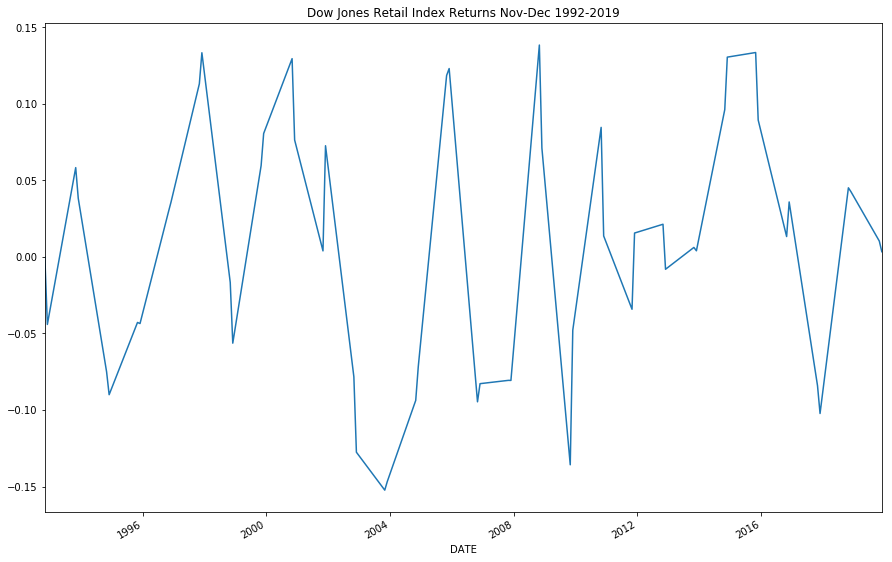

In [69]:
# A plot of returns on of the retail index between November/December from 1992-2019.
retail_returns.plot(figsize=(15,10),title="Dow Jones Retail Index Returns Nov-Dec 1992-2019")

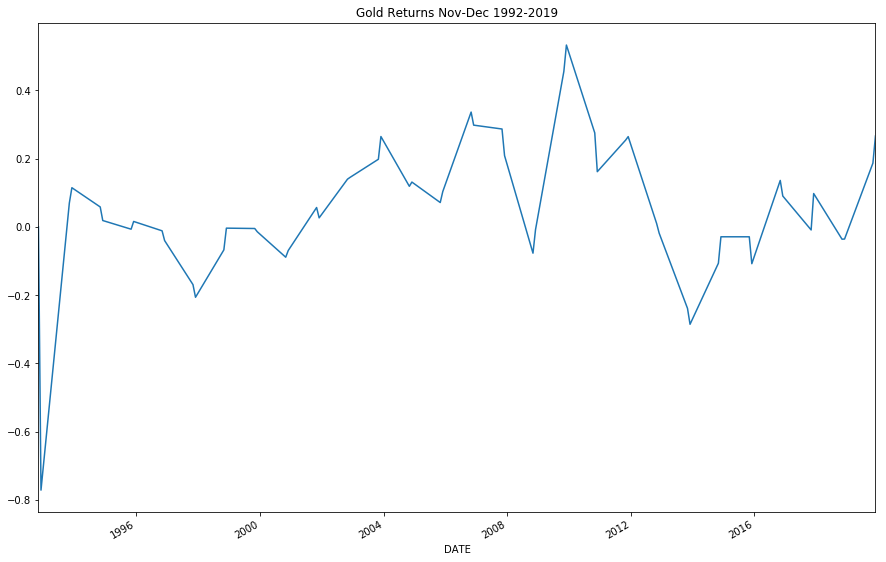

In [70]:
# A plot of returns on of the gold index between November/December from 1992-2019.
gold_returns.plot(figsize=(15,10),title="Gold Returns Nov-Dec 1992-2019")

**Below I will be running a correlation test to analyze the relationship between the Nov-Dec Dow Retail Index Returns and Nov-Dec Gold Returns. My goal is to see them move as opposite as possible, the ideal would be a score of -1. I will also run one on the Nov-Dec Dow Retail Index and February and March of the preceding year Gold Returns testing the affect of Holiday Sales on Q4 GDP and Q4 GDP on the preceding years initial Q1 Gold offerings.**

In [71]:
retail_returns.corr(gold_returns)

-0.3927238215010168

**Above one can see that there is a negative correlation as predicted. We have a score of -0.39. This is solely looking at November/December. I believe that it will be even more negative if we compare Nov/Dec retail to Gold February/March which is when the Q4 report is released.**

In [72]:
gold_returns_df=gold_returns.to_frame()

In [73]:
retail_returns_df=retail_returns.to_frame()

In [74]:
returns_df=gold_returns_df.merge(retail_returns_df, how='outer', left_index=True, right_index=True)

**Here we see a plot of the gold returns and retail returns one can see that while gold has steeper movements, they are moving in opposite directions for the most part.**

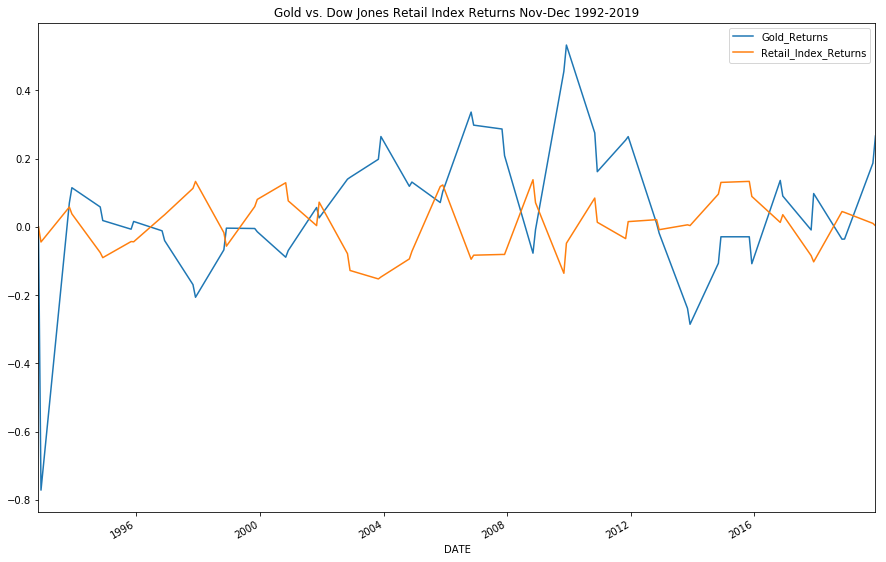

In [75]:
returns_df.plot(figsize=(15,10),title="Gold vs. Dow Jones Retail Index Returns Nov-Dec 1992-2019")

In [76]:
returns_df.corr()

Gold_Returns  Retail_Index_Returns
Gold_Returns              1.000000             -0.392724
Retail_Index_Returns     -0.392724              1.000000

In [77]:
#gold vs retail DF February/March 1993-2019.
feb_gold_df=Path("~/git/HolidaySales/DataSets/gold_retail_febmar.csv")
f_m_gold_retail_df=pd.read_csv(feb_gold_df,parse_dates=True,infer_datetime_format=True,index_col="DATE")

In [78]:
f_m_gold_retail_df=f_m_gold_retail_df.pct_change().dropna()

In [79]:
f_m_gold_retail_df=f_m_gold_retail_df.rename(columns={"close":"Gold_Returns","monthly_retail":"Retail_Index_Returns"})

In [80]:
f_m_gold_retail_df.head()

Gold_Returns  Retail_Index_Returns
DATE                                          
1993-03-01     -0.003791             -0.009689
1994-02-01      0.161796              0.096264
1994-03-01     -0.000917              0.018373
1995-02-01     -0.013244              0.038908
1995-03-01     -0.001462              0.008496

**Here I will show the relationship between both gold and the retail index returns during Feb/March of 1993-2019 looking at how the release of the previous years Q4 GDP which includes the Nov/Dec sales affects anything. I would believe that regardless of anything we should see a negative correation but it should be even stronger, but I believe the strongest is soon to come.**

In [81]:
f_m_gold_retail_df.corr()

Gold_Returns  Retail_Index_Returns
Gold_Returns              1.000000              0.291552
Retail_Index_Returns      0.291552              1.000000

**I suspected that they would move in a stronger negative correlation but it actually has became more positive.**

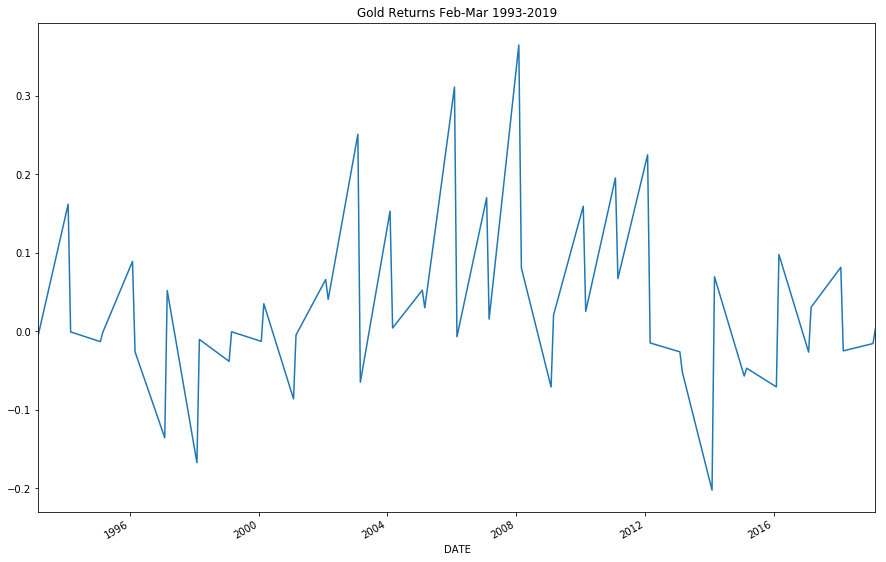

In [82]:
f_m_gold_retail_df["Gold_Returns"].plot(figsize=(15,10),title="Gold Returns Feb-Mar 1993-2019")

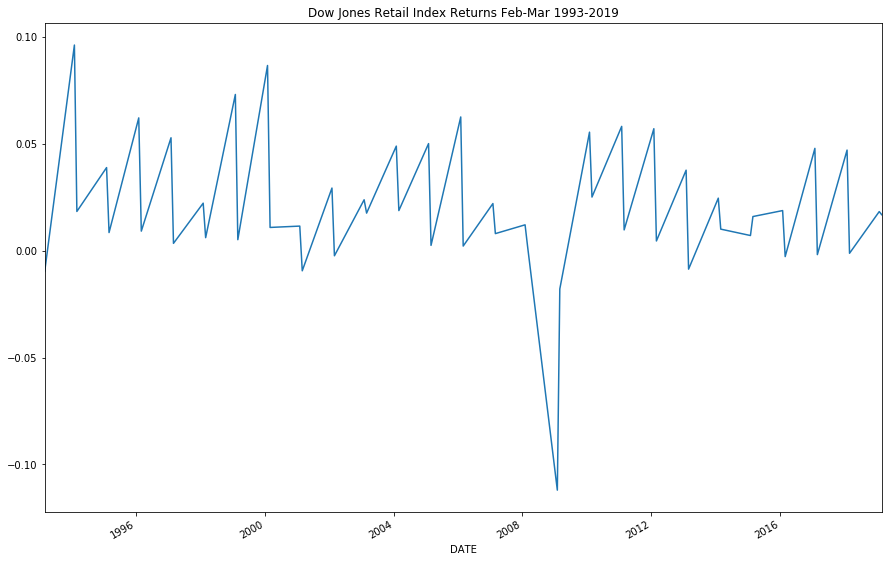

In [83]:
f_m_gold_retail_df["Retail_Index_Returns"].plot(figsize=(15,10),title="Dow Jones Retail Index Returns Feb-Mar 1993-2019")

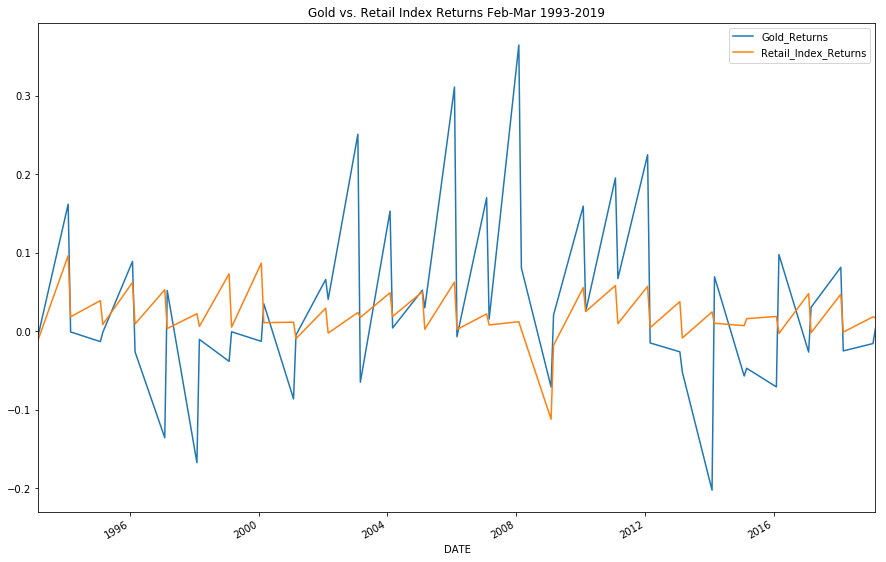

In [84]:
f_m_gold_retail_df.plot(figsize=(15,10),title="Gold vs. Retail Index Returns Feb-Mar 1993-2019")

**From this last graph we can see that there is much more volatility during this period for gold which makes sense with the theory. If you were going to invest from the good holiday sales you would have already done so before they started or sometime in the November to December period, but Feb/Mar would be the time when people would make more interesting decisions on gold after looking at the health of the economy from how spending as a whole and the Q4 GDP came out to be. A perfect example is how big of a spike up gold receive in 2008 when we were in economic turmoil.I believe the best analysis will be next when we look at the Nov/Dec Retail Index vs. the Feb/Mar Gold.**

In [85]:
f_m_gold_returns=f_m_gold_retail_df["Gold_Returns"].reset_index()

In [86]:
f_m_gold_returns=f_m_gold_returns.drop(columns=["DATE"])

In [87]:
retail_returns_data=retail_returns.reset_index()

In [88]:
retail_returns_data=retail_returns_data.drop(columns=["DATE"])

In [89]:
retail_returns_data.head()

Retail_Index_Returns
0              0.000000
1             -0.044113
2              0.058275
3              0.038244
4             -0.075080

In [90]:
magic_df=pd.DataFrame({"Retail":retail_returns_data["Retail_Index_Returns"],"Gold":f_m_gold_returns["Gold_Returns"]})

In [91]:
magic_df.corr()

Retail      Gold
Retail  1.000000 -0.109112
Gold   -0.109112  1.000000

**Not suprisingly we see here that our theory is correct. While we had somewhat of a positive correlation looking at the retail index and the gold returns during the same time period, when we compare the Feb/Mar returns of Gold for the proceeding year to the Nov/Dec returns for retail of the previous year, we can see that there is a negative correlation. We could definetly make the assumption that if one is looking at holiday sales predictions, if the numbers are looking good you should buy the retail index and sell gold and one could go as far as predicting to sell gold again in the February/March period of the next year, which is again the time frame we would expect the Q4 numbers to be released.**

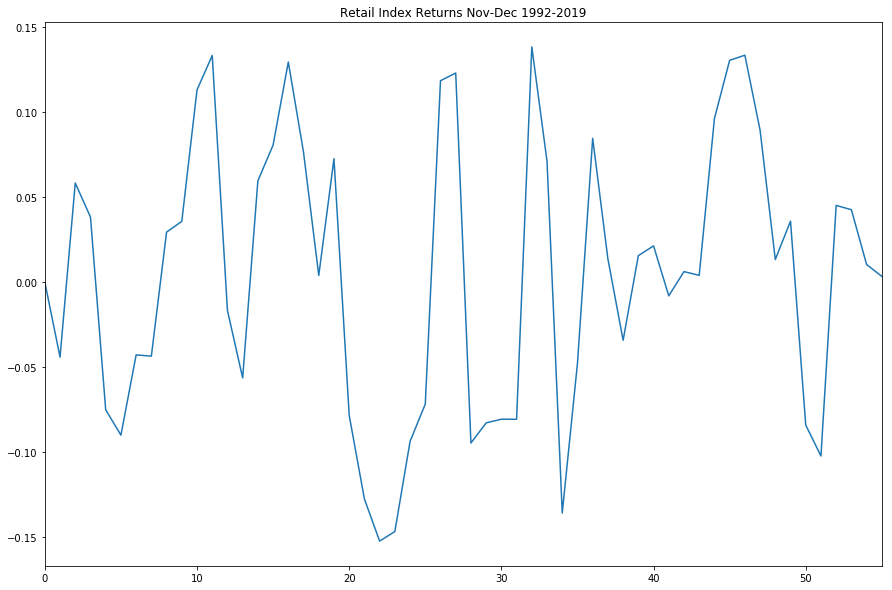

In [92]:
magic_df["Retail"].plot(figsize=(15,10),title="Retail Index Returns Nov-Dec 1992-2019")

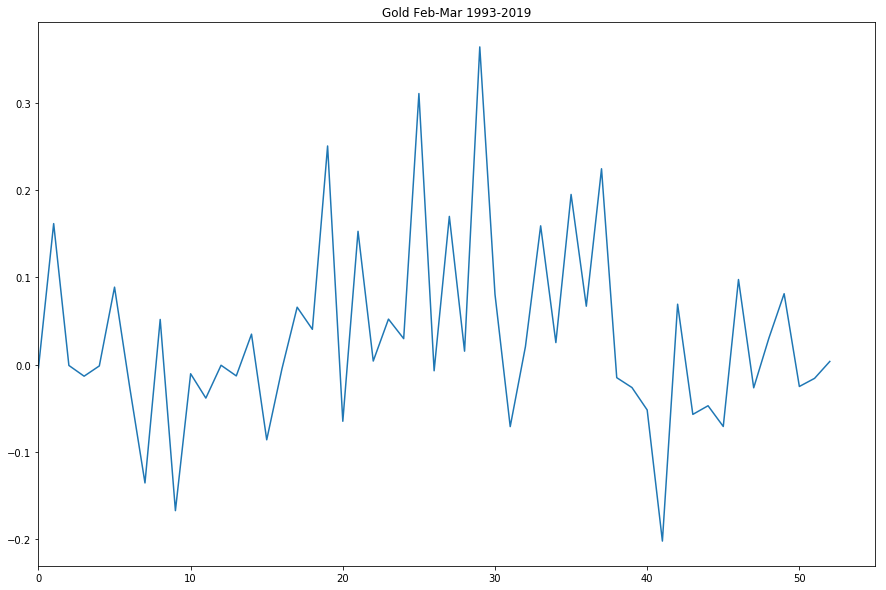

In [93]:
magic_df["Gold"].plot(figsize=(15,10),title="Gold Feb-Mar 1993-2019")

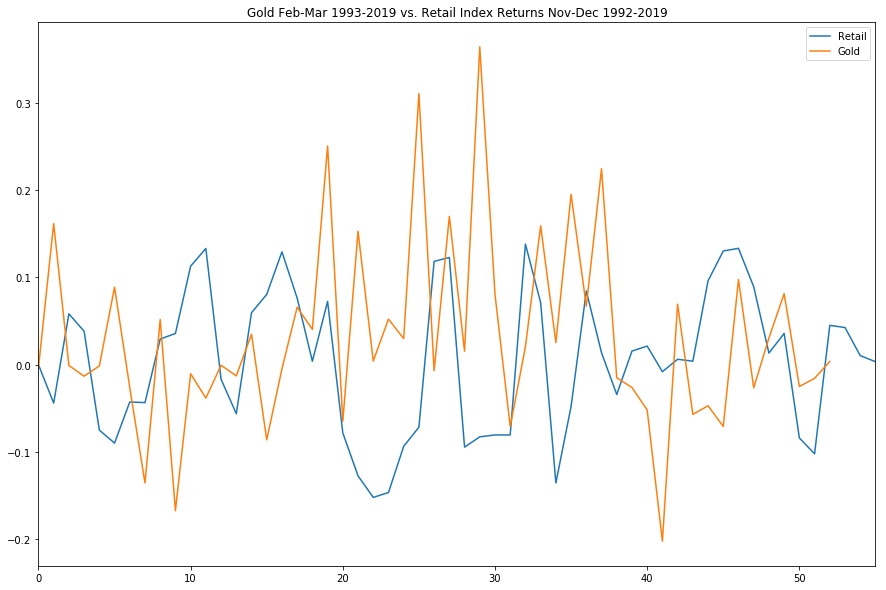

In [94]:
magic_df.plot(figsize=(15,10),title="Gold Feb-Mar 1993-2019 vs. Retail Index Returns Nov-Dec 1992-2019")

### **I will now create an LSTM model with the full features dataframe to make unsupervised predictions for holiday sales.**

In [95]:
#Holiday Sales predictions.
main_df.head()

NYT_sentiment  gas_prices  consumer_sentiments  unemployment_rate  \
DATE                                                                            
1992-11-01       0.812100     1.11120                 85.3                7.4   
1992-12-01       0.458857     1.07750                 91.0                7.4   
1993-11-01       0.762175     1.06640                 81.2                6.6   
1993-12-01       0.500550     1.01400                 88.2                6.5   
1994-11-01       0.667100     1.11575                 91.6                5.6   

                  CPI  Retail_Index_Returns  Consumer_debt_service  \
DATE                                                                 
1992-11-01  -3.664766              0.000000               4.660212   
1992-12-01 -55.865683             -0.044113               4.660212   
1993-11-01  -4.077295              0.058275               4.755414   
1993-12-01 -49.461028              0.038244               4.755414   
1994-11-01  -4.587534             -0.075080               5.120072   

            GDP_growth         sales          GDP  Gold_Returns  
DATE                                                             
1992-11-01         4.4  -18182.99304  -576.109447      0.000000  
1992-12-01         4.4 -143836.96580 -4628.850176     -0.770981  
1993-11-01         2.6  -15860.78098  -676.804025      0.069956  
1993-12-01         2.6 -125760.23380 -4202.521831      0.114896  
1994-11-01         4.1  -12429.20455  -618.354534      0.058500

In [96]:
# Create my features and target.
y=main_df["sales"].values
X=main_df.drop(columns=["sales"]).values

In [97]:
y[:2]

array([ -18182.99304, -143836.9658 ])

In [98]:
y=y.reshape(-1,1)

In [99]:
X=X.reshape(-1,10)

In [100]:
X.shape

(56, 10)

In [101]:
X[:2]

array([[ 8.12100000e-01,  1.11120000e+00,  8.53000000e+01,
         7.40000000e+00, -3.66476565e+00,  0.00000000e+00,
         4.66021200e+00,  4.40000000e+00, -5.76109447e+02,
         0.00000000e+00],
       [ 4.58857143e-01,  1.07750000e+00,  9.10000000e+01,
         7.40000000e+00, -5.58656833e+01, -4.41131545e-02,
         4.66021200e+00,  4.40000000e+00, -4.62885018e+03,
        -7.70980612e-01]])

In [102]:
y.shape

(56, 1)

In [103]:
y[:2]

array([[ -18182.99304],
       [-143836.9658 ]])

In [104]:
X.shape

(56, 10)

In [105]:
# Split the data so I can use 70% of the data for training and the remainder for testing.
split = int(0.7 * len(X))

In [106]:
X_train = X[: split]

In [107]:
X_test = X[split:]

In [108]:
y_train = y[: split]

In [109]:
y_test = y[split:]

In [110]:
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()

In [111]:
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [112]:
X_train = scaler.transform(X_train)

In [113]:
X_test = scaler.transform(X_test)

In [114]:
scaler.fit(y)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [115]:
y_train = scaler.transform(y_train)

In [116]:
y_test = scaler.transform(y_test)

In [117]:
y_test.shape

(17, 1)

In [118]:
y_train.shape

(39, 1)

In [119]:
X_test.shape

(17, 10)

In [120]:
X_train.shape

(39, 10)

In [121]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [122]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [123]:
# Create the instance of my Sequential model.
model = Sequential()

In [124]:
number_units = 1000
dropout_fraction = 0.2

In [125]:
# This is Layer 1.
model.add(LSTM(units=number_units,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(dropout_fraction))

In [126]:
# This is Layer 2.
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

In [127]:
# This is Layer 3.
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

In [128]:
# Here I create my output layer.
model.add(Dense(1))

In [129]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [130]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 1000)          4008000   
_________________________________________________________________
dropout (Dropout)            (None, 10, 1000)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 1000)          8004000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 1000)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [131]:
model.fit(X_train,y_train,epochs=100,shuffle=False,batch_size=5,verbose=1)

Epoch 1/100
8/8 [==============================] - 15s 2s/step - loss: 0.0740
Epoch 2/100
8/8 [==============================] - 20s 3s/step - loss: 0.0122
Epoch 3/100
8/8 [==============================] - 17s 2s/step - loss: 0.0163
Epoch 4/100
8/8 [==============================] - 19s 2s/step - loss: 0.0401
Epoch 5/100
8/8 [==============================] - 9s 1s/step - loss: 0.0501
Epoch 6/100
8/8 [==============================] - 9s 1s/step - loss: 0.0305
Epoch 7/100
8/8 [==============================] - 8s 1s/step - loss: 0.0168
Epoch 8/100
8/8 [==============================] - 8s 1s/step - loss: 0.0222
Epoch 9/100
8/8 [==============================] - 16s 2s/step - loss: 0.0218
Epoch 10/100
8/8 [==============================] - 16s 2s/step - loss: 0.0158
Epoch 11/100
8/8 [==============================] - 15s 2s/step - loss: 0.0147
Epoch 12/100
8/8 [==============================] - 11s 1s/step - loss: 0.0190
Epoch 13/100
8/8 [==============================] - 17s 2s/step -

In [132]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 3ms/step - loss: 0.0084


0.008382435888051987

In [ ]:
predictions=model.predict(X_test)

In [ ]:
predictions

In [ ]:
# Recover the original prices instead of the scaled version
predicted_sales = scaler.inverse_transform(predictions)
real_sales = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Here I create a DataFrame of Real and Predicted values.
sales_df = pd.DataFrame({"Real": real_sales.ravel(),"Predicted": predicted_sales.ravel()}, index = df.index[-len(real_sales): ]) 
sales_df.head()

## **Model Evaluation**

In [ ]:
sales_df.plot()

In [ ]:
mse = mean_squared_error(sales_df["Real"],sales_df["Predicted"])
rmse = np.sqrt(mse)
std = np.std(sales_df["Real"])
r2=r2_score(sales_df["Real"], sales_df["Predicted"])

In [ ]:
mse

In [ ]:
rmse

In [ ]:
std

In [ ]:
r2

### A second model trying to predict holiday sales, working to get a better r2.

In [ ]:
# Create the instance of my Sequential model.
model_two = Sequential()

In [ ]:
number_units = 1000
dropout_fraction = 0.5

In [ ]:
# This is Layer 1.
model_two.add(LSTM(units=number_units,return_sequences=True,input_shape=(X_train.shape[1],1)))
model_two.add(Dropout(dropout_fraction))

In [ ]:
# This is Layer 2.
model_two.add(LSTM(units=number_units, return_sequences=True))
model_two.add(Dropout(dropout_fraction))

In [ ]:
# This is Layer 3.
model_two.add(LSTM(units=number_units, return_sequences=True))
model_two.add(Dropout(dropout_fraction))

In [ ]:
# This is Layer 4.
model_two.add(LSTM(units=number_units))
model_two.add(Dropout(dropout_fraction))

In [ ]:
# Here I create my output layer.
model_two.add(Dense(1))

In [ ]:
model_two.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
model_two.summary()

In [ ]:
model_two.fit(X_train,y_train,epochs=100,shuffle=False,batch_size=5,verbose=1)

In [ ]:
model_two.evaluate(X_test,y_test)

In [ ]:
predictions_two=model_two.predict(X_test)

In [ ]:
predictions_two

In [ ]:
# Recover the original prices instead of the scaled version
predicted_sales_two = scaler.inverse_transform(predictions_two)
real_sales_two = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Here I create a DataFrame of Real and Predicted values.
sales_two_df = pd.DataFrame({"Real": real_sales_two.ravel(),"Predicted": predicted_sales_two.ravel()}, index = df.index[-len(real_sales): ]) 
sales_two_df.head()

## **Model Evaluation**

In [ ]:
sales_df.plot()

In [ ]:
sales_two_df.plot()

**After making different changes to the units, dropout rate, number of layers, and optimizer, I have found that the best setup for me is in #1 with an r2 of 0.64 which isnt bad for a whole unsupervised situation.**

In [ ]:
r2_two=r2_score(sales_two_df["Real"], sales_two_df["Predicted"])

## **Strategy Alogrithm**

**Here we will simply be creating a function that will accept the best model prediction for sales and from there compare that prediction to the median value for holiday sales. If the prediction is above the median value the function would tell you to buy the retail index. From our previous correlation analysis above, we would also go a step further as well and say to sell gold.**

In [236]:
# Correlation between sales and Retail Index Returns.
main_df["sales"].corr(main_df["Retail_Index_Returns"])

0.054107037513179065

**Above we can see that there is not the strongest correlation between the retail index returns and the sales but for the sake of theory and science, here we are.**

In [237]:
# Correlation between sales and Gold Returns.
main_df["sales"].corr(main_df["Gold_Returns"])

0.2581218786307487

**This right here is pretty much ruining everything but again, theory is theory.**

In [238]:
main_df.head()

NYT_sentiment  gas_prices  consumer_sentiments  unemployment_rate  \
DATE                                                                            
1992-11-01       0.812100     1.11120                 85.3                7.4   
1992-12-01       0.458857     1.07750                 91.0                7.4   
1993-11-01       0.762175     1.06640                 81.2                6.6   
1993-12-01       0.500550     1.01400                 88.2                6.5   
1994-11-01       0.667100     1.11575                 91.6                5.6   

                  CPI  Retail_Index_Returns  Consumer_debt_service  \
DATE                                                                 
1992-11-01  -3.664766              0.000000               4.660212   
1992-12-01 -55.865683             -0.044113               4.660212   
1993-11-01  -4.077295              0.058275               4.755414   
1993-12-01 -49.461028              0.038244               4.755414   
1994-11-01  -4.587534             -0.075080               5.120072   

            GDP_growth         sales          GDP  Gold_Returns  
DATE                                                             
1992-11-01         4.4  -18182.99304  -576.109447      0.000000  
1992-12-01         4.4 -143836.96580 -4628.850176     -0.770981  
1993-11-01         2.6  -15860.78098  -676.804025      0.069956  
1993-12-01         2.6 -125760.23380 -4202.521831      0.114896  
1994-11-01         4.1  -12429.20455  -618.354534      0.058500

In [240]:
predictions_end

array([  54944.84552452,  -13916.33571303, -101407.76352706,
        -16159.75164795, -110716.65222824,  -14233.10371317,
       -107675.28276355,  -14146.86076554,  -88727.10719252,
        -13632.41496685,  -70901.57016347,  -12791.34639226,
        -63163.4103279 ,  -12224.37430836,  -50377.78350674,
         -6923.25764525,  -27951.00081986,   -7770.50772708,
        -18371.32886851,  -15043.74023048,  -20461.93277406,
         -9335.21603985,  -15698.94515781,   -2192.97378871,
         -4892.1908865 ,    6784.17906909,    6430.35648868,
         15202.80732776,   14733.481425  ,   17646.5483508 ,
         19196.96155336,   14300.40391301,   14364.09584834,
         -7839.58235775,   -9811.54095412,   -6314.09806866,
        -14608.66272231,   16103.1190931 ,   -7718.59528539,
         27173.88432872,   -1585.78428583,   37094.04444547,
          3584.70421286,   53571.73278819,    8070.81945819,
         62077.37030336,   11035.51983019,   71468.99014946,
          8789.13548437,

In [266]:
trend=ts_trend1.shift()

In [272]:
trend.shape

(56,)

In [280]:
predictions_end=np.append(0,predictions_end)

In [287]:
predictions_end[10]

-13632.414966853927

In [290]:
predictions=[]
i=0
for x in predictions_end:
    new= trend[i] + x
    i=i+1
    predictions.append(new)

In [291]:
predictions

[0.0,
 226710.83856501372,
 168538.44526892414,
 91724.44102570789,
 187617.234746212,
 103643.42866630311,
 210610.1374876157,
 127504.07139568379,
 231164.50382493457,
 166446.33177621645,
 251064.34919853118,
 202907.93036396586,
 269645.8477820383,
 227335.57995964022,
 285687.07274403353,
 254216.8879034001,
 303555.1323774006,
 287553.0464373318,
 311861.7388851606,
 304443.40518824355,
 309951.41705005965,
 305658.2438655831,
 316816.45947692945,
 309375.6501514811,
 320710.69570359815,
 314803.06840740674,
 322335.7508427963,
 317059.5865679655,
 320360.3455786205,
 314184.44723485544,
 311567.7821670765,
 308087.126779848,
 298901.38676376815,
 295593.90149438556,
 271054.5283473038,
 267849.86803782545,
 271241.65645804687,
 263958.4871013639,
 296768.6722687496,
 276084.884371357,
 315092.25582409406,
 291350.7157093357,
 335871.7394230017,
 308950.7570392673,
 366206.58727957483,
 328601.6272222007,
 391092.7120801411,
 349068.83936255024,
 418985.7177192271,
 366181.505212

In [333]:
# Create a dataframe for my tests.
test_df=pd.DataFrame({"Predictions":predictions,"Retail_Index_Returns":main_df["Retail_Index_Returns"],"Gold_Returns":main_df["Gold_Returns"]})

In [334]:
algo_data=algo_data.sort_index()

In [335]:
algo_data[:2]

DATE
1992-11-01    153583.0
1992-12-01    155614.0
Name: y_monthly_retail, dtype: float64

In [336]:
# Declare a function that will take the median of all sales data.
def signal(prediction):
    sales_median=algo_data.median()
    if prediction <= sales_median:
        return(-1)
    elif prediction > sales_median:
        return(1)   

In [337]:
Main_df.head()

NYT_sentiment  gas_prices  consumer_sentiments  unemployment_rate  \
DATE                                                                            
1992-11-01       0.812100     1.11120                 85.3                7.4   
1992-12-01       0.458857     1.07750                 91.0                7.4   
1993-11-01       0.762175     1.06640                 81.2                6.6   
1993-12-01       0.500550     1.01400                 88.2                6.5   
1994-11-01       0.667100     1.11575                 91.6                5.6   

                 CPI  retail_index  Consumer_debt_service  GDP_growth  \
DATE                                                                    
1992-11-01  1.274991         91.12               4.660212         4.4   
1992-12-01 -0.483394         93.87               4.660212         4.4   
1993-11-01  1.257425         96.43               4.755414         2.6   
1993-12-01 -0.403048         97.46               4.755414         2.6   
1994-11-01  1.133907         89.19               5.120072         4.1   

                  sales         GDP  
DATE                                 
1992-11-01   321.257921  203.323418  
1992-12-01 -3463.103652   -3.262152  
1993-11-01  1701.333988   46.564202  
1993-12-01 -2545.465504 -160.400560  
1994-11-01  4185.398191   47.551421

In [338]:
test_df.head()

Predictions  Retail_Index_Returns  Gold_Returns
DATE                                                         
1992-11-01       0.000000              0.000000      0.000000
1992-12-01  226710.838565             -0.044113     -0.770981
1993-11-01  168538.445269              0.058275      0.069956
1993-12-01   91724.441026              0.038244      0.114896
1994-11-01  187617.234746             -0.075080      0.058500

In [339]:
# Declare a function that will create hypothetical returns on a $10,000 investment using our theory analyzing the prediction data.
def back_test(predictions):
    initial_investment=10000
    final_returns=[]
    #i=-1
    for index,row in predictions.iterrows():
        result=signal(row[0])
        if result == 1:
            invest_return=initial_investment * (row[1])
            final_returns.append(invest_return)
        elif result == -1:
            invest_return=initial_investment * (row[-1])
            final_returns.append(invest_return)
    test_df["Return_of_Investment"]=final_returns
    return test_df

In [340]:
back_test(test_df)

Predictions  Retail_Index_Returns  Gold_Returns  \
DATE                                                            
1992-11-01       0.000000              0.000000      0.000000   
1992-12-01  226710.838565             -0.044113     -0.770981   
1993-11-01  168538.445269              0.058275      0.069956   
1993-12-01   91724.441026              0.038244      0.114896   
1994-11-01  187617.234746             -0.075080      0.058500   
1994-12-01  103643.428666             -0.089986      0.018762   
1995-11-01  210610.137488             -0.042830     -0.006632   
1995-12-01  127504.071396             -0.043522      0.016048   
1996-11-01  231164.503825              0.029401     -0.011389   
1996-12-01  166446.331776              0.035718     -0.040005   
1997-11-01  251064.349199              0.112995     -0.168962   
1997-12-01  202907.930364              0.133280     -0.206069   
1998-11-01  269645.847782             -0.016665     -0.067240   
1998-12-01  227335.579960             -0.056342     -0.003567   
1999-11-01  285687.072744              0.059576     -0.004612   
1999-12-01  254216.887903              0.080566     -0.014149   
2000-11-01  303555.132377              0.129428     -0.088725   
2000-12-01  287553.046437              0.076332     -0.068995   
2001-11-01  311861.738885              0.003910      0.056874   
2001-12-01  304443.405188              0.072566      0.026560   
2002-11-01  309951.417050             -0.078321      0.139879   
2002-12-01  305658.243866             -0.127549      0.145106   
2003-11-01  316816.459477             -0.152300      0.198218   
2003-12-01  309375.650151             -0.146685      0.264813   
2004-11-01  320710.695704             -0.093708      0.118982   
2004-12-01  314803.068407             -0.071740      0.131418   
2005-11-01  322335.750843              0.118431      0.071470   
2005-12-01  317059.586568              0.122963      0.103566   
2006-11-01  320360.345579             -0.094634      0.336453   
2006-12-01  314184.447235             -0.082784      0.298149   
2007-11-01  311567.782167             -0.080628      0.286843   
2007-12-01  308087.126780             -0.080666      0.208863   
2008-11-01  298901.386764              0.138309     -0.076874   
2008-12-01  295593.901494              0.071056     -0.007969   
2009-11-01  271054.528347             -0.135748      0.455792   
2009-12-01  267849.868038             -0.047839      0.532776   
2010-11-01  271241.656458              0.084553      0.275424   
2010-12-01  263958.487101              0.013654      0.161845   
2011-11-01  296768.672269             -0.034207      0.254337   
2011-12-01  276084.884371              0.015564      0.264525   
2012-11-01  315092.255824              0.021302      0.010153   
2012-12-01  291350.715709             -0.008085     -0.018265   
2013-11-01  335871.739423              0.006162     -0.238602   
2013-12-01  308950.757039              0.003981     -0.285174   
2014-11-01  366206.587280              0.096160     -0.106371   
2014-12-01  328601.627222              0.130417     -0.028874   
2015-11-01  391092.712080              0.133431     -0.028902   
2015-12-01  349068.839363              0.089336     -0.107705   
2016-11-01  418985.717719              0.013262      0.136199   
2016-12-01  366181.505213              0.035860      0.090529   
2017-11-01  459660.265420             -0.084076     -0.008848   
2017-12-01  390211.312238             -0.102262      0.097818   
2018-11-01  499745.773584              0.045096     -0.035942   
2018-12-01  420283.163449              0.042570     -0.035437   
2019-11-01  530504.044445              0.010350      0.186882   
2019-12-01  439000.276473              0.003374      0.266333   

            Return_of_Investment  
DATE                              
1992-11-01              0.000000  
1992-12-01          -7709.806122  
1993-11-01            699.558174  
1993-12-01           1148.961602  
1994-11-01            584.996559 

In [341]:
# Hypothetical average if you used this strategy for 28 years. 
average=test_df["Return_of_Investment"].mean()

In [344]:
test_df["Return_of_Investment"].describe()

count      56.000000
mean       75.400349
std      1736.208734
min     -7709.806122
25%      -788.977149
50%        16.869483
75%       706.083345
max      5327.763496
Name: Return_of_Investment, dtype: float64

In [343]:
test_df["Return_of_Investment"].sum()

4222.419548444475

In [345]:
# Volatility over the period.
volatility=test_df["Return_of_Investment"].std()*np.sqrt(56)

In [346]:
volatility

12992.596470488857

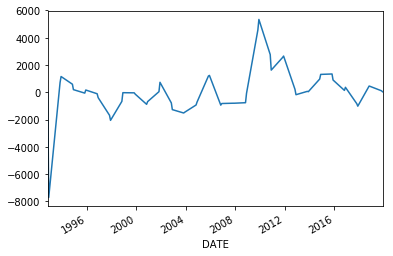

In [347]:
test_df["Return_of_Investment"].plot(title="Hypothetical Return on Investment")